In [4]:
import pandas as pd

campaign_data = pd.read_csv("dataset.csv")

print(campaign_data.head())

                       Campaign report  \
0  01 December 2023 - 21 December 2023   
1                      Campaign status   
2                              Enabled   
3                              Enabled   
4                              Enabled   

                                   Unnamed: 1     Unnamed: 2 Unnamed: 3  \
0                                         NaN            NaN        NaN   
1                                    Campaign  Currency code       Cost   
2        unb-leadgen-physiotherapy-08/08/2023            INR   30923.64   
3   unb-leadgen-generalyoga-whatsapp-18/10/23            INR   17691.97   
4  unb-leadgen-generalyoga-exactmatch-20/8/23            INR   68193.26   

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN   
1        CTR   Avg. CPC     Clicks  All conv.      Impr.   
2      6.76%      34.75        890       95.2      13171   
3       1.1%      11.14       1588     111.85     144623

In [5]:
correct_headers = campaign_data.iloc[1].values.tolist()

filtered_data = campaign_data.iloc[2:].reset_index(drop=True)
filtered_data.columns = correct_headers


In [6]:
numeric_columns = ['Cost', 'Avg. CPC', 'Clicks', 'All conv.', 'Impr.', 'Conv. rate', 'Conversions', 'Cost / conv.']
for col in numeric_columns:
    filtered_data[col] = pd.to_numeric(filtered_data[col].str.replace('%', ''), errors='coerce')


print(filtered_data.head())

  Campaign status                                    Campaign Currency code  \
0         Enabled        unb-leadgen-physiotherapy-08/08/2023           INR   
1         Enabled   unb-leadgen-generalyoga-whatsapp-18/10/23           INR   
2         Enabled  unb-leadgen-generalyoga-exactmatch-20/8/23           INR   
3         Enabled             unb-leadgen-generalyoga-26/5/23           INR   
4         Enabled              unb-leadgen-weightloss-25/7/23           INR   

        Cost     CTR  Avg. CPC  Clicks  All conv.   Impr.  \
0   30923.64   6.76%     34.75     890      95.20   13171   
1   17691.97    1.1%     11.14    1588     111.85  144623   
2   68193.26  16.14%     40.49    1684     287.58   10431   
3  295187.29  10.37%     63.80    4627     504.76   44601   
4   15396.94  12.74%     46.24     333      30.85    2613   

                   Bid strategy type  Conv. rate Conv. value  \
0               Maximise conversions        5.73           0   
1               Maximise conve

In [7]:
#key metrices
summary = filtered_data.describe()
print(summary)

                Cost   Avg. CPC        Clicks    All conv.         Impr.  \
count      10.000000  10.000000     10.000000    10.000000  1.000000e+01   
mean   198499.620000  38.547000   6519.500000   525.866000  2.219001e+05   
std    223027.776906  15.359364  10218.607877   614.850287  4.692622e+05   
min     13754.920000  11.140000    333.000000    30.850000  2.409000e+03   
25%     20999.887500  35.945000    956.750000    98.012500  1.064075e+04   
50%     58327.580000  41.190000   1636.000000   199.715000  2.888600e+04   
75%    441004.262500  46.070000   9127.000000  1003.735000  2.079942e+05   
max    516166.440000  63.800000  33314.000000  1748.480000  1.531647e+06   

       Conv. rate  Conversions  Cost / conv.  
count   10.000000     10.00000     10.000000  
mean     4.546000    243.96000    733.853000  
std      2.101043    304.77559    334.489027  
min      0.000000      0.00000      0.000000  
25%      4.700000     27.00250    575.762500  
50%      5.000000     89.99500   

In [8]:
best_campaigns = filtered_data.sort_values(by='Conversions', ascending=False).head(5)
worst_campaigns = filtered_data.sort_values(by='Conversions').head(5)

print("Best Performing Campaigns:\n", best_campaigns)
print("Worst Performing Campaigns:\n", worst_campaigns)

Best Performing Campaigns:
     Campaign status                                    Campaign Currency code  \
8    Total: Account                                         NaN           INR   
7  Total: Campaigns                                         NaN           INR   
9     Total: Search                                         NaN           INR   
3           Enabled             unb-leadgen-generalyoga-26/5/23           INR   
2           Enabled  unb-leadgen-generalyoga-exactmatch-20/8/23           INR   

        Cost     CTR  Avg. CPC  Clicks  All conv.    Impr.  \
8  516166.44   2.18%     15.49   33314    1748.48  1531647   
7  489609.92   4.64%     46.07   10627    1170.06   229118   
9  489609.92   4.64%     46.07   10627    1170.06   229118   
3  295187.29  10.37%     63.80    4627     504.76    44601   
2   68193.26  16.14%     40.49    1684     287.58    10431   

                   Bid strategy type  Conv. rate Conv. value  \
8                                NaN        1.92

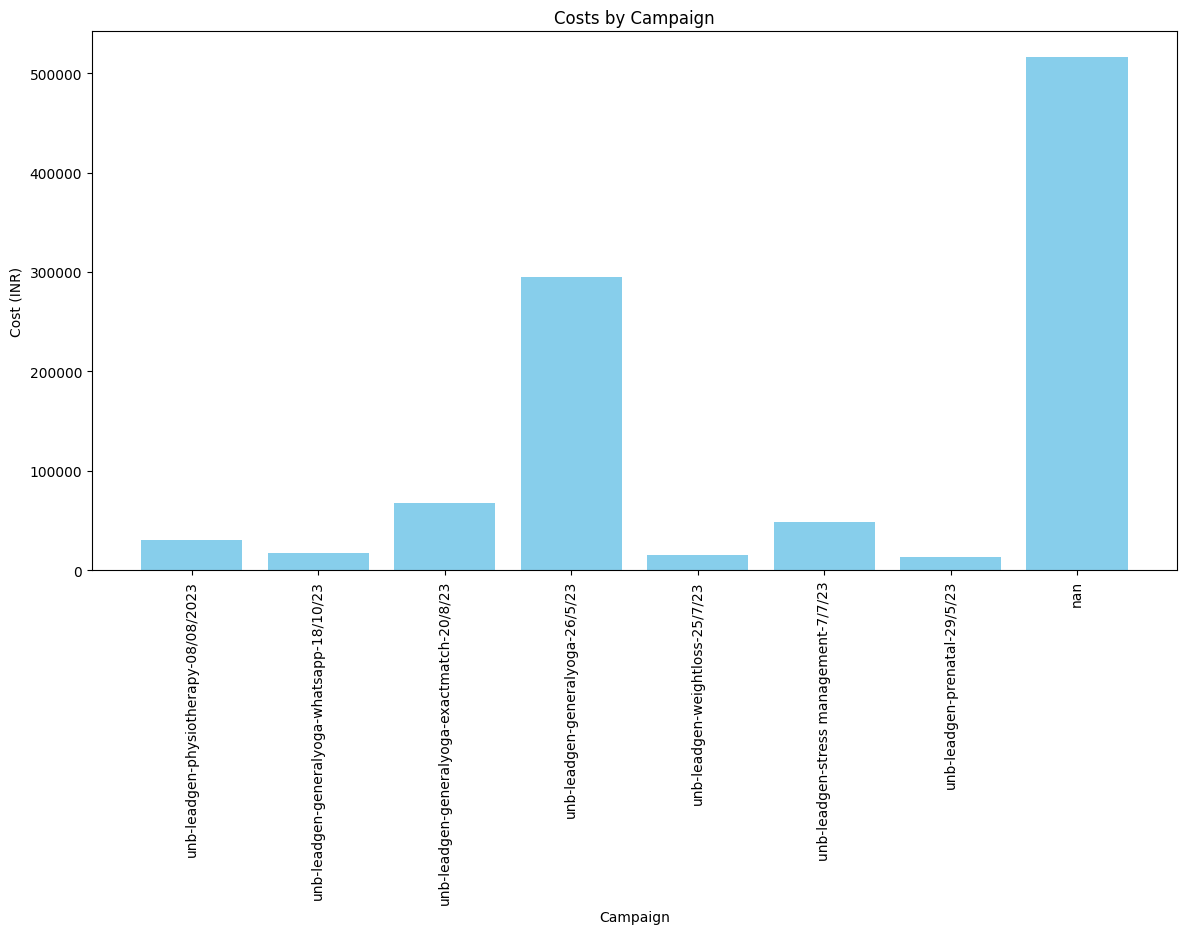

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt

filtered_data['Campaign'] = filtered_data['Campaign'].astype(str)

# Plot a bar graph for Costs by Campaign
plt.figure(figsize=(14, 7))
plt.bar(filtered_data['Campaign'], filtered_data['Cost'], color='skyblue')
plt.xlabel('Campaign')
plt.ylabel('Cost (INR)')
plt.title('Costs by Campaign')
plt.xticks(rotation=90)
plt.show()
plt.savefig('costs_by_campaign.png')


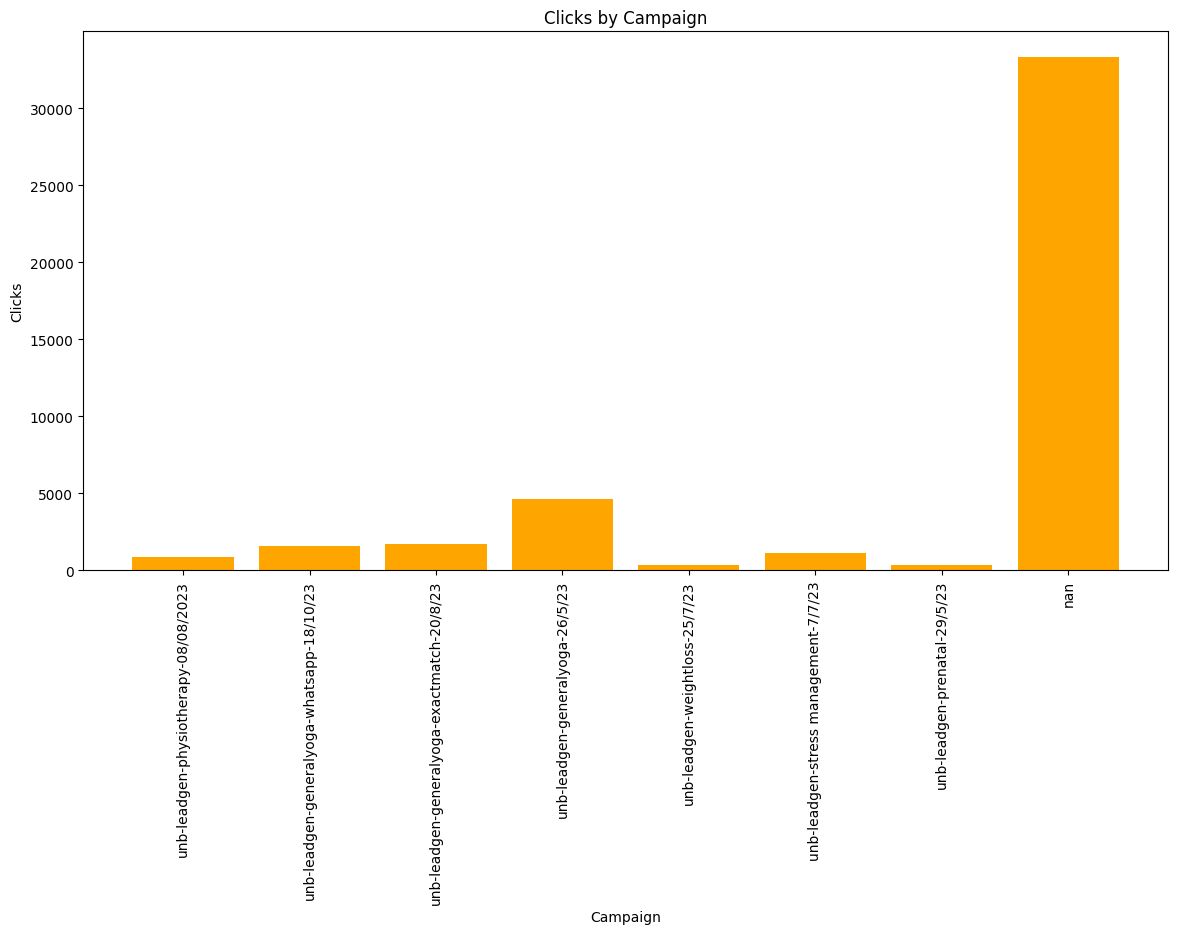

In [24]:
# Plot a bar graph for Clicks by Campaign
plt.figure(figsize=(14, 7))
plt.bar(filtered_data['Campaign'], filtered_data['Clicks'], color='orange')
plt.xlabel('Campaign')
plt.ylabel('Clicks')
plt.title('Clicks by Campaign')
plt.xticks(rotation=90)

plt.show()


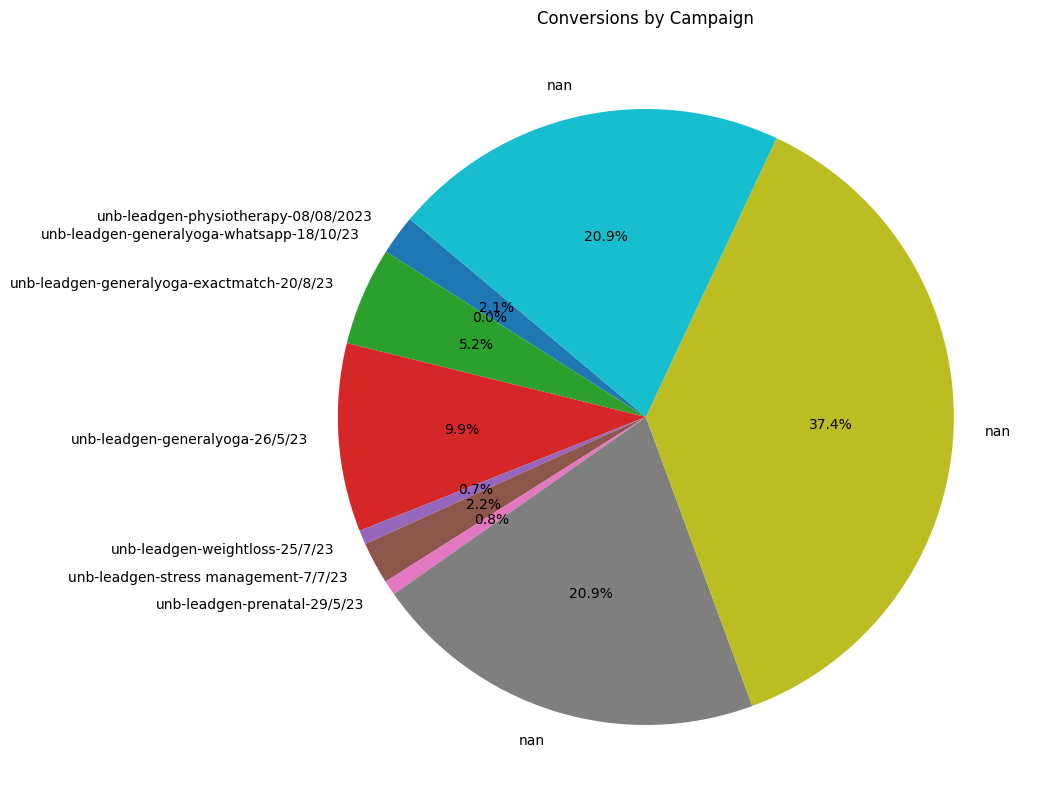

In [25]:
# Filter out rows where Conversions is NaN
filtered_data_clean = filtered_data.dropna(subset=['Conversions'])

# Plot a pie chart for Conversions by Campaign
plt.figure(figsize=(10, 10))
plt.pie(filtered_data_clean['Conversions'], labels=filtered_data_clean['Campaign'], autopct='%1.1f%%', startangle=140)
plt.title('Conversions by Campaign')
plt.show()


In [26]:
best_campaigns = filtered_data.iloc[[8, 7, 9, 3, 2]].reset_index(drop=True)
worst_campaigns = filtered_data.iloc[[1, 4, 6, 0, 5]].reset_index(drop=True)


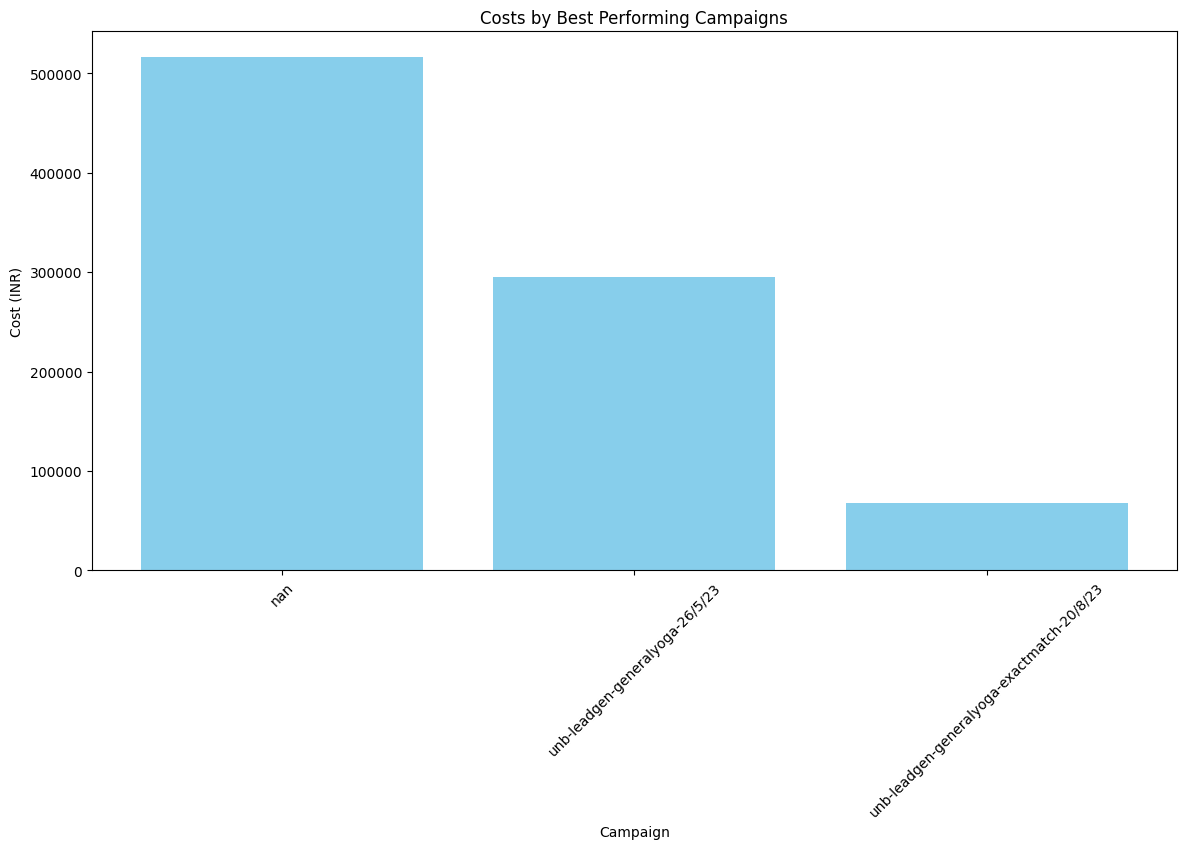

In [27]:
import matplotlib.pyplot as plt

# Plot a bar graph for Costs by Best Performing Campaigns
plt.figure(figsize=(14, 7))
plt.bar(best_campaigns['Campaign'], best_campaigns['Cost'], color='skyblue')
plt.xlabel('Campaign')
plt.ylabel('Cost (INR)')
plt.title('Costs by Best Performing Campaigns')
plt.xticks(rotation=45)
plt.show()


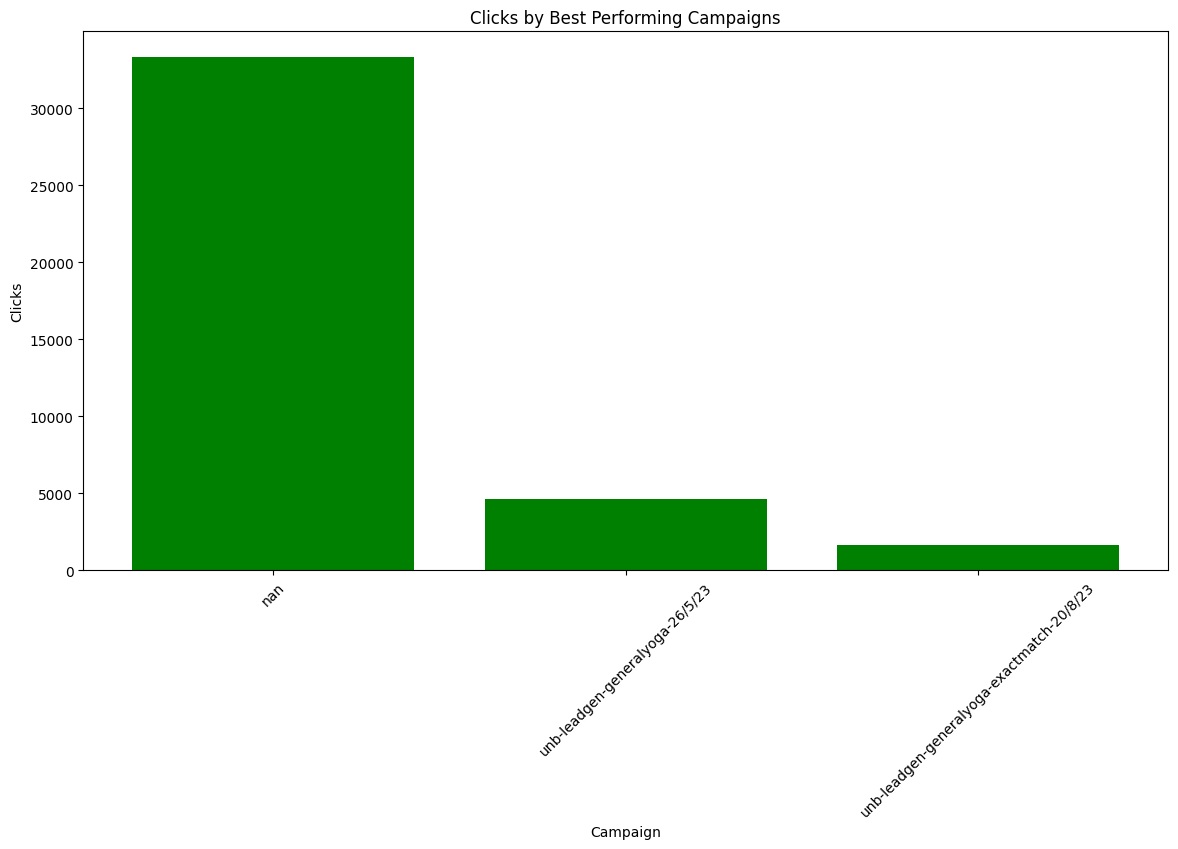

In [28]:
# Plot a bar graph for Clicks by Best Performing Campaigns
plt.figure(figsize=(14, 7))
plt.bar(best_campaigns['Campaign'], best_campaigns['Clicks'], color='green')
plt.xlabel('Campaign')
plt.ylabel('Clicks')
plt.title('Clicks by Best Performing Campaigns')
plt.xticks(rotation=45)
plt.show()


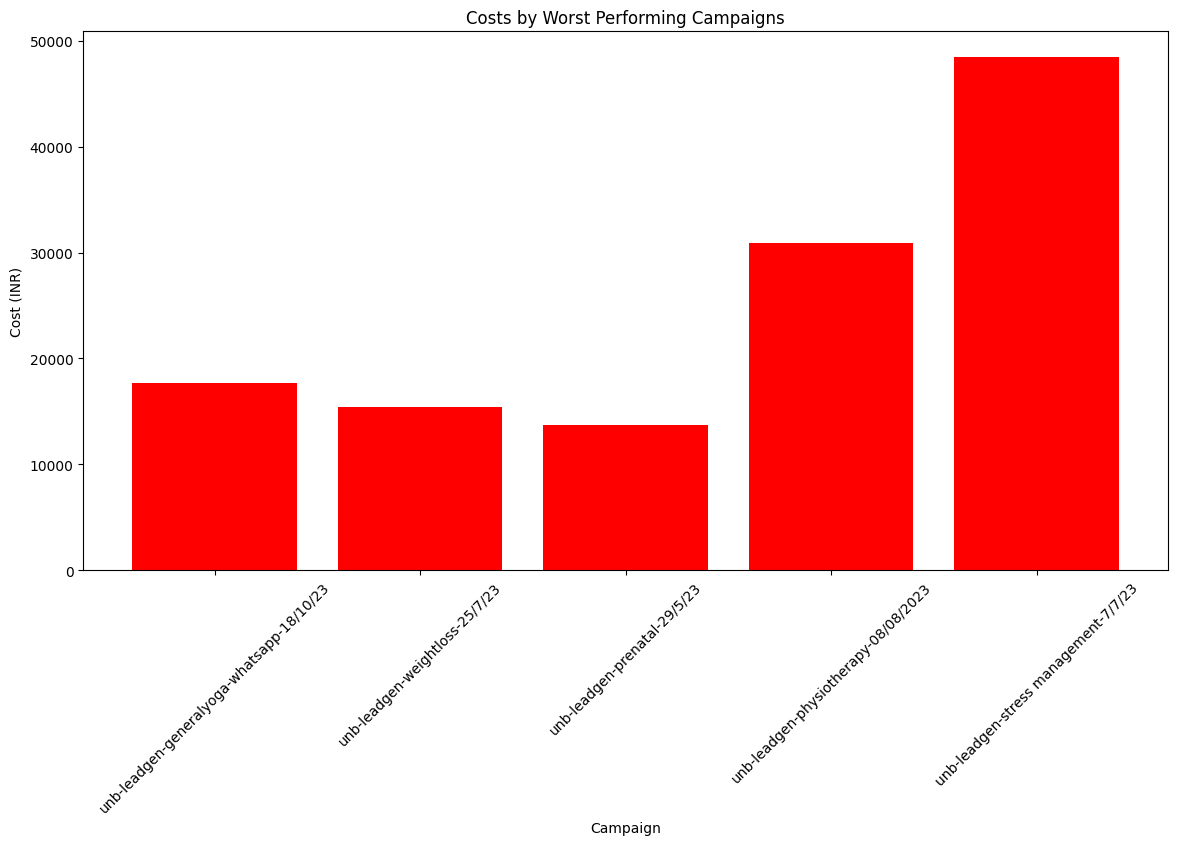

In [29]:
# Plot a bar graph for Costs by Worst Performing Campaigns
plt.figure(figsize=(14, 7))
plt.bar(worst_campaigns['Campaign'], worst_campaigns['Cost'], color='red')
plt.xlabel('Campaign')
plt.ylabel('Cost (INR)')
plt.title('Costs by Worst Performing Campaigns')
plt.xticks(rotation=45)
plt.show()


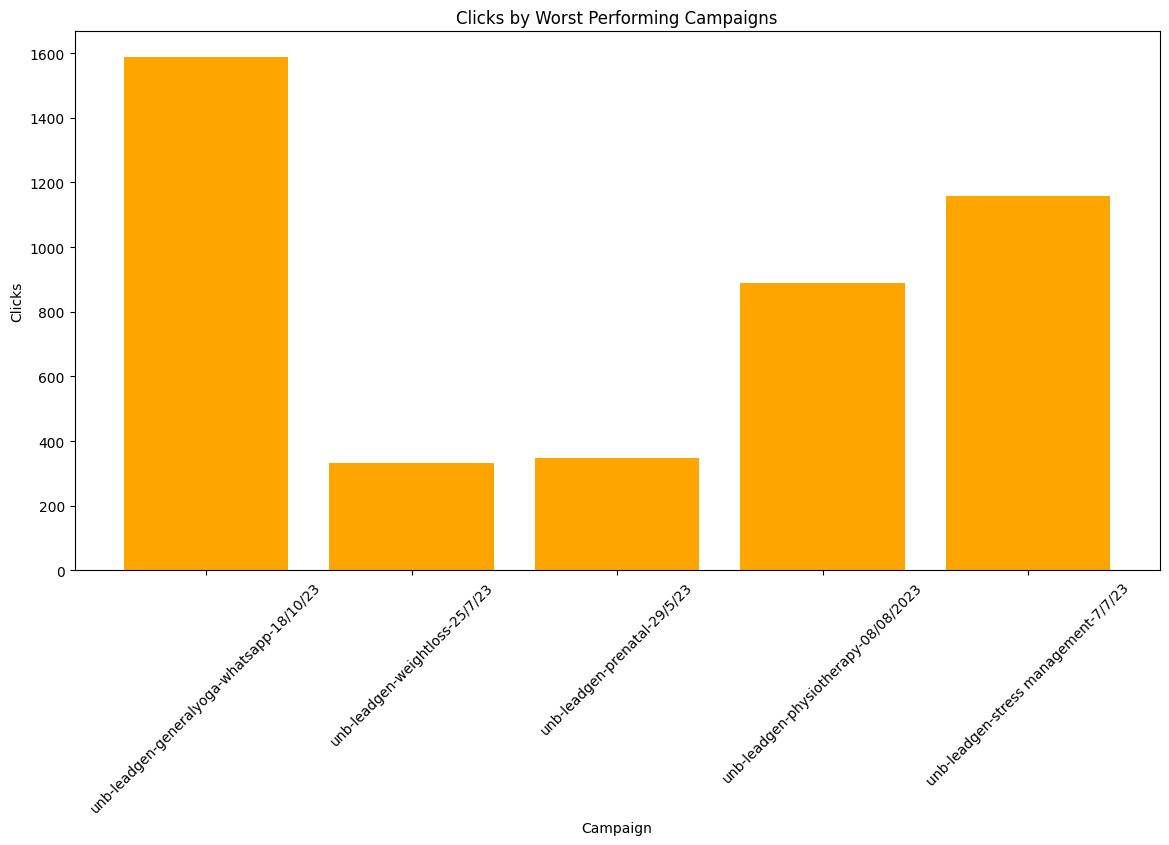

In [30]:
# Plot a bar graph for Clicks by Worst Performing Campaigns
plt.figure(figsize=(14, 7))
plt.bar(worst_campaigns['Campaign'], worst_campaigns['Clicks'], color='orange')
plt.xlabel('Campaign')
plt.ylabel('Clicks')
plt.title('Clicks by Worst Performing Campaigns')
plt.xticks(rotation=45)
plt.show()
